# Descriptive Data analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
!gdown --id '1I_q1MbbIJ1LX-J-M67qg47e2oEEQXdo9'

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1I_q1MbbIJ1LX-J-M67qg47e2oEEQXdo9
To: /content/Dataset for SA and ML.csv
100% 136k/136k [00:00<00:00, 92.1MB/s]


In [3]:
df = pd.read_csv('/Users/usmanali/Uwindsor/AI/PhonePriceSenseAI/Datasets/Dataset for SA and ML.csv')
df.head()

,Unnamed: 0,Rating ?/5,Number of Ratings,Processor,Price in INR,Date of Scraping,Company Name,Ram_size,Storage_size,Battery_size
0,0,4.2,33561,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",5649,2023-06-17,POCO,2.0,32,5000.0
1,1,4.2,77128,Mediatek Dimensity 700 Processor,11999,2023-06-17,POCO,4.0,64,5000.0
2,2,4.3,15175,Helio G36 Processor,6999,2023-06-17,POCO,4.0,64,5000.0
3,3,4.2,22621,Mediatek Helio G85 Processor,7749,2023-06-17,POCO,4.0,64,5000.0
4,4,4.3,15175,Helio G36 Processor,6999,2023-06-17,POCO,4.0,64,5000.0


In [18]:
df['Company Name'].unique()

array(['POCO', 'realme', 'SAMSUNG', 'OPPO', 'Google', 'vivo', 'Nothing',
       'REDMI', 'Mi', 'Nokia', 'MOTOROLA', 'OnePlus', 'Huawei', 'Nexus',
       'Alcatel', 'Lenovo', 'Infinix'], dtype=object)

In [4]:
df['Storage_size'].unique()

array(['32', '64', '128', '256', '0', nan, '512', '8', '2', '2.27', '16',
       '4', '48', 'Expandable', '0.125', '10', '20', '100'], dtype=object)

In [5]:
df['Storage_size'] = df['Storage_size'].replace('Expandable','1')

In [6]:
df['Storage_size'] = df['Storage_size'].astype(float)

In [7]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [8]:
df.dropna(inplace=True)

### Here the total values count is 1623
### The mean of the columns of each value is different for every other value
### The min, max value is also given in this description

### Central Tendency

In [9]:
def centralTendency(column_name):
  mean = df[column_name].mean()
  median = df[column_name].median()
  mode = df[column_name].mode()
  print("Mean of the",column_name," Column:", mean)
  print("Median of the", column_name," Column:", median)
  print("Mode of the ", column_name," Column:", mode)


In [10]:
# Central Tendency (Mean, Median, Mode)
    #Rating
for i in df.columns:
  if df[i].dtype == 'O':
    pass
  else:
    centralTendency(i)
    print("--------------------------------------------------------------------------")
    print("")



Mean of the Rating ?/5  Column: 4.1986386138613865
Median of the Rating ?/5  Column: 4.3
Mode of the  Rating ?/5  Column: 0    4.3
Name: Rating ?/5, dtype: float64
--------------------------------------------------------------------------

Mean of the Number of Ratings  Column: 45431.892945544554
Median of the Number of Ratings  Column: 7845.5
Mode of the  Number of Ratings  Column: 0    0
Name: Number of Ratings, dtype: int64
--------------------------------------------------------------------------

Mean of the Price in INR  Column: 19571.246905940596
Median of the Price in INR  Column: 15497.0
Mode of the  Price in INR  Column: 0    9999
Name: Price in INR, dtype: int64
--------------------------------------------------------------------------

Mean of the Ram_size  Column: 8.454749381188119
Median of the Ram_size  Column: 6.0
Mode of the  Ram_size  Column: 0    8.0
Name: Ram_size, dtype: float64
--------------------------------------------------------------------------

Mean of the

### Insights:

1. Rating ?/5 has not much difference between mean, median and mode
2. Number of Ranting has significant difference in all the tree.
3. Price column shows the drop from mean to mode which mean it is Right skewed data.
4. Ram size has not much difference too.
5. Lastly, Battery size is lower mean and higher median and mode.

### Data despersion

In [11]:
# Let's see the description of the dataset
df.describe()

,Rating ?/5,Number of Ratings,Price in INR,Ram_size,Storage_size,Battery_size
count,1616.000000,1.616000e+03,1616.000000,1616.000000,1616.000000,1616.000000
mean,4.198639,4.543189e+04,19571.246906,8.454749,107.195260,4541.919554
std,0.501006,9.998826e+04,14878.338103,30.609708,71.006053,1021.917751
min,0.000000,0.000000e+00,1250.000000,0.046875,0.000000,800.000000
25%,4.200000,1.310500e+03,10499.000000,4.000000,64.000000,4250.000000
50%,4.300000,7.845500e+03,15497.000000,6.000000,128.000000,5000.000000
75%,4.400000,3.920100e+04,24073.500000,8.000000,128.000000,5000.000000
max,4.700000,1.342530e+06,134999.000000,512.000000,512.000000,7000.000000


### Variance and skewness

In [12]:
for i in df.columns:
  if df[i].dtype == 'O':
    pass
  else:
    skew = df[i].skew()
    variance = df[i].var()

    if skew < 0:
      print("The Skewnes of the ",i," column is: ",skew)
      print("And the column is left-skewed")
    elif skew > 0:
      print("The Skewnes of the ",i," column is: ",skew)
      print("And the column is right-skewed")
    else:
      print("The Skewnes of the ",i," column is: ",skew)
      print("And the column is Normal distributed")


    print("The Variance of the ",i," column is: ",variance)
    print("--------------------------------------------------")
    print("")


The Skewnes of the  Rating ?/5  column is:  -7.13272439122987
And the column is left-skewed
The Variance of the  Rating ?/5  column is:  0.25100743340588105
--------------------------------------------------

The Skewnes of the  Number of Ratings  column is:  4.4083786211495175
And the column is right-skewed
The Variance of the  Number of Ratings  column is:  9997652012.408936
--------------------------------------------------

The Skewnes of the  Price in INR  column is:  2.6836578888977334
And the column is right-skewed
The Variance of the  Price in INR  column is:  221364944.7037058
--------------------------------------------------

The Skewnes of the  Ram_size  column is:  14.668116580019035
And the column is right-skewed
The Variance of the  Ram_size  column is:  936.954231347756
--------------------------------------------------

The Skewnes of the  Storage_size  column is:  1.1583265631094497
And the column is right-skewed
The Variance of the  Storage_size  column is:  5041.859

### Corelation

In [13]:
sns.heatmap(df.corr(),annot = True)

ValueError: could not convert string to float: 'Mediatek Helio A22 Processor, Upto 2.0 GHz Processor'

### Insights:

1. Price in INR is our dependent column and others are Independent so Each column has some effect on the Price column.

# Inferential Statistics

### Hypothesis Testing

In [14]:
#One-Sample t-test

# In this test we will look at the price of the phone with the population mean price that is 40000 INR. If the mean price is near to it we will reject the alternative hypothesis
# Otherwise, will accept the alternative hyothesis and reject the null hypothesis

from scipy import stats

tstatistics , p_value = stats.ttest_1samp(a = df['Price in INR'], popmean = 40000)

print("The t-statistics value is: ",tstatistics)
print("The p_value is: ",p_value)

if p_value < 0.05:
  print("We are rejecting the Null Hypothesis and accepting the Alternative Hypothesis")
else:
  print("We are accepting the Null Hypothesis and rejecting the Alternative Hypothesis")

The t-statistics value is:  -55.196064579309564
The p_value is:  0.0
We are rejecting the Null Hypothesis and accepting the Alternative Hypothesis


# Outliers

In [15]:
df.head()

,Rating ?/5,Number of Ratings,Processor,Price in INR,Date of Scraping,Company Name,Ram_size,Storage_size,Battery_size
0,4.2,33561,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",5649,2023-06-17,POCO,2.0,32.0,5000.0
1,4.2,77128,Mediatek Dimensity 700 Processor,11999,2023-06-17,POCO,4.0,64.0,5000.0
2,4.3,15175,Helio G36 Processor,6999,2023-06-17,POCO,4.0,64.0,5000.0
3,4.2,22621,Mediatek Helio G85 Processor,7749,2023-06-17,POCO,4.0,64.0,5000.0
4,4.3,15175,Helio G36 Processor,6999,2023-06-17,POCO,4.0,64.0,5000.0


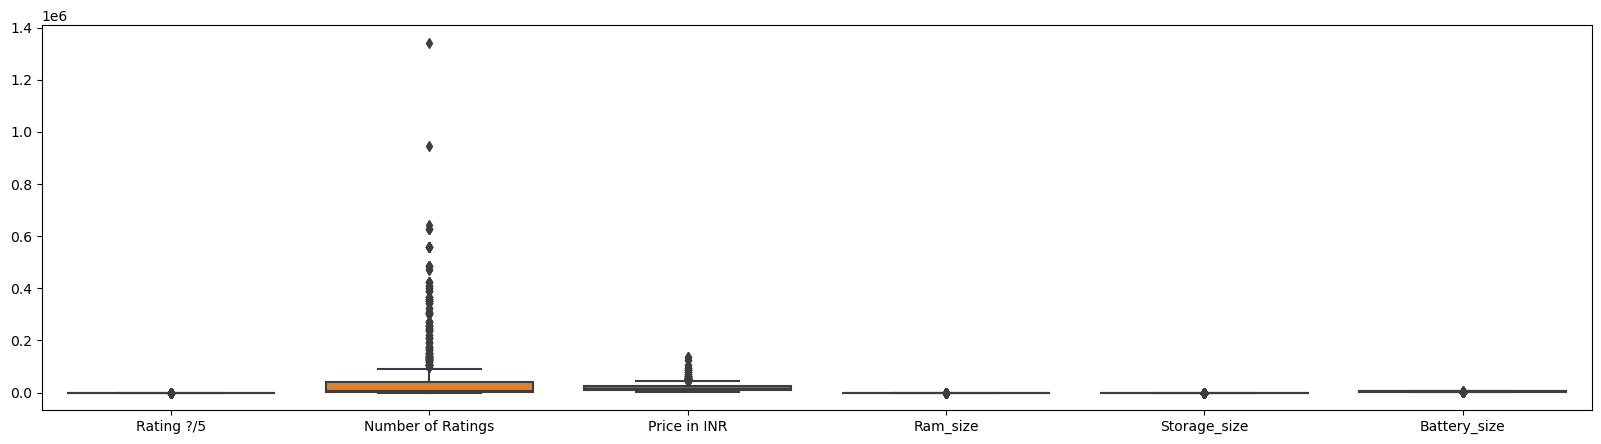

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 5))
sns.boxplot(data = df)
plt.show()

In [17]:
# Calculate the quartiles (Q1 and Q3) and IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outliers (e.g., 1.5 times the IQR)
threshold = 1.5

# Identify the outliers using the threshold
outliers = ((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR)))

# Display the rows containing outliers
outlier_rows = df[outliers.any(axis=1)]
#print(outlier_rows)
df_no_outliers = df[~outliers.any(axis=1)]
print(df_no_outliers)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

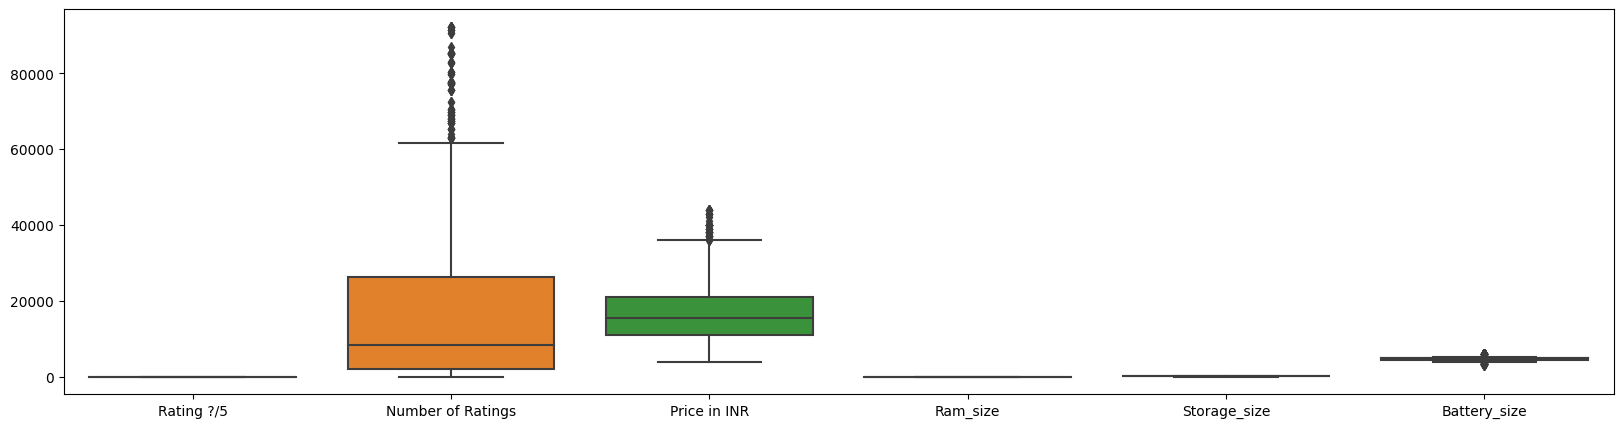

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 5))
sns.boxplot(data = df_no_outliers)
plt.show()

In [123]:
#covert inot dataframe
df1 = pd.DataFrame(df_no_outliers)
df1.head()

,Rating ?/5,Number of Ratings,Processor,Price in INR,Date of Scraping,Company Name,Ram_size,Storage_size,Battery_size
0,4.2,33561,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",5649,2023-06-17,POCO,2.0,32.0,5000.0
1,4.2,77128,Mediatek Dimensity 700 Processor,11999,2023-06-17,POCO,4.0,64.0,5000.0
2,4.3,15175,Helio G36 Processor,6999,2023-06-17,POCO,4.0,64.0,5000.0
3,4.2,22621,Mediatek Helio G85 Processor,7749,2023-06-17,POCO,4.0,64.0,5000.0
4,4.3,15175,Helio G36 Processor,6999,2023-06-17,POCO,4.0,64.0,5000.0


In [124]:
#Drop the useless columns
df1.drop(['Processor','Date of Scraping'], axis=1, inplace=True)

In [125]:
df1= df1.reset_index()
df1

,index,Rating ?/5,Number of Ratings,Price in INR,Company Name,Ram_size,Storage_size,Battery_size
0,0,4.2,33561,5649,POCO,2.0,32.0,5000.0
1,1,4.2,77128,11999,POCO,4.0,64.0,5000.0
2,2,4.3,15175,6999,POCO,4.0,64.0,5000.0
3,3,4.2,22621,7749,POCO,4.0,64.0,5000.0
4,4,4.3,15175,6999,POCO,4.0,64.0,5000.0
...,...,...,...,...,...,...,...,...
1015,1618,4.3,25582,14999,Infinix,4.0,64.0,5000.0
1016,1619,4.3,25582,14999,Infinix,4.0,64.0,5000.0
1017,1620,4.3,25582,14999,Infinix,4.0,64.0,5000.0
1018,1621,4.2,7117,18999,Infinix,8.0,128.0,4500.0


In [126]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cn_en = le.fit_transform(df1['Company Name'])
cn_en

array([12, 12, 12, ...,  3,  3,  3])

In [127]:
cn_en1 = pd.DataFrame(data = cn_en, columns=['Company_name'])

In [129]:
df1 = pd.concat([df1,cn_en1],axis=1)
df1.drop(['index','Company Name'],axis=1,inplace=True)
df1

,Rating ?/5,Number of Ratings,Price in INR,Ram_size,Storage_size,Battery_size,Company_name,Company_name
0,4.2,33561,5649,2.0,32.0,5000.0,12,12
1,4.2,77128,11999,4.0,64.0,5000.0,12,12
2,4.3,15175,6999,4.0,64.0,5000.0,12,12
3,4.2,22621,7749,4.0,64.0,5000.0,12,12
4,4.3,15175,6999,4.0,64.0,5000.0,12,12
...,...,...,...,...,...,...,...,...
1015,4.3,25582,14999,4.0,64.0,5000.0,3,3
1016,4.3,25582,14999,4.0,64.0,5000.0,3,3
1017,4.3,25582,14999,4.0,64.0,5000.0,3,3
1018,4.2,7117,18999,8.0,128.0,4500.0,3,3


In [131]:
df1.to_csv('Dataset_for_ML.csv')